In [30]:
from math import sqrt
import alpaca_trade_api as tradeapi
from datetime import datetime
import pytz
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# API credentials
api_key = 'AKQB26E5HLHLA54FOT9T'
api_secret = 'hNgAGISeVTThSFOoa1biaGcRuWYD8HvOvtb1AB7c'
base_url = 'https://paper-api.alpaca.markets'  

# Initialize the Alpaca API
api = tradeapi.REST(api_key, api_secret, base_url, api_version='v2')

symbol = 'AAPL' 
start_date = datetime(2000, 1, 1).astimezone(pytz.timezone('UTC')) 
end_date = datetime(2022, 1, 31).astimezone(pytz.timezone('UTC'))  

daily_prices = api.get_bars(symbol, tradeapi.TimeFrame.Day, start_date.isoformat(), end_date.isoformat()).df




In [31]:
X = daily_prices[['close', 'high', 'low', 'trade_count', 'open']]
Y = daily_prices['volume']

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


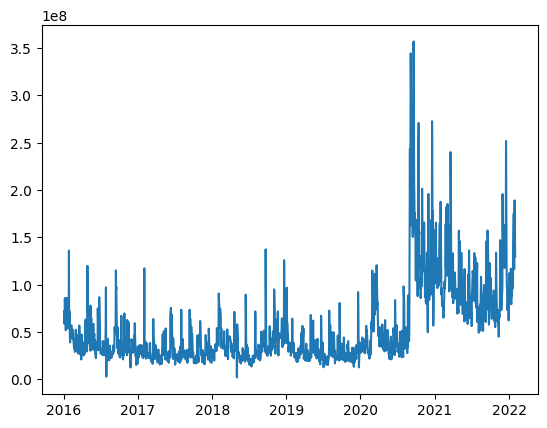

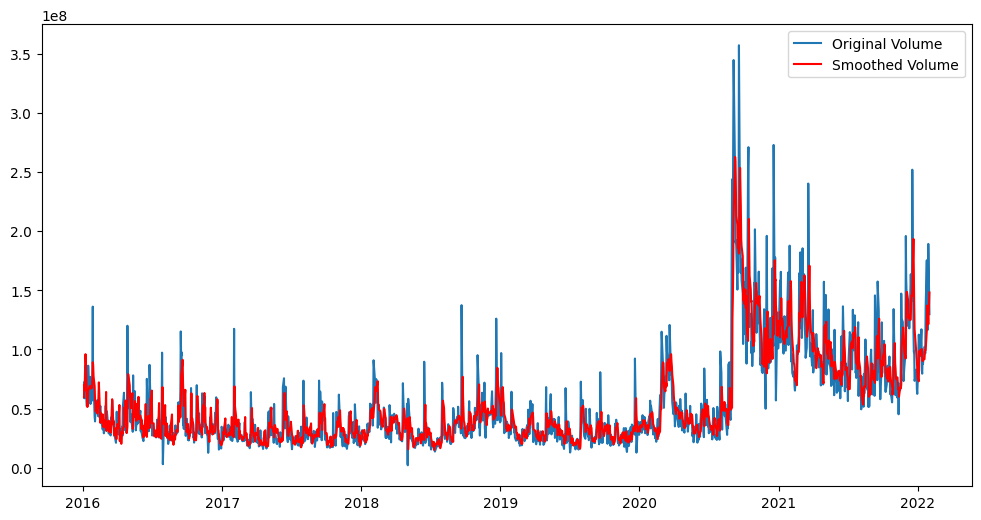

In [32]:
# Exponential Smoothing
model = ExponentialSmoothing(Y, trend="add", seasonal="add", seasonal_periods=12)
fitted_model = model.fit()

plt.plot(Y)
plt.show()

# Plot original data and smoothed data
plt.figure(figsize=(12, 6))
plt.plot(Y.index, Y, label='Original Volume')
plt.plot(Y.index, fitted_model.fittedvalues, label='Smoothed Volume', color='red')
plt.legend()
plt.show()

y_smooth = fitted_model.fittedvalues

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

In [34]:
# DECISION TREE MODEL

regressor = DecisionTreeRegressor(random_state=40)
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {sqrt(mse)}")
print(f"R-squared: {r2}")

Mean Squared Error: 19077254.566572808
R-squared: 0.7853405680532459


In [35]:
# XGB BOOST MODEL

regressor = xgb.XGBRegressor(n_estimators=100, random_state=40)
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {sqrt(mse)}")
print(f"R-squared: {r2}")

Mean Squared Error: 15002035.958351536
R-squared: 0.8672548599576182


In [36]:
# FOREST MODEL

regressor = RandomForestRegressor(n_estimators=100, random_state=40)
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {sqrt(mse)}")
print(f"R-squared: {r2}")

Mean Squared Error: 14599163.142357346
R-squared: 0.8742887486905337


In [37]:
# DECISION TREE MODEL AND SMOOTHED

X_train, X_test, y_train, y_test = train_test_split(X, y_smooth, test_size=0.2, random_state=40)

regressor = DecisionTreeRegressor(random_state=40)
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {sqrt(mse)}")
print(f"R-squared: {r2}")

Mean Squared Error: 22024104.024501834
R-squared: 0.6151879381544715


In [38]:
# XGB BOOST MODEL and SMOOTHED

X_train, X_test, y_train, y_test = train_test_split(X, y_smooth, test_size=0.2, random_state=40)

regressor = xgb.XGBRegressor(n_estimators=100, random_state=40)
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {sqrt(mse)}")
print(f"R-squared: {r2}")

Mean Squared Error: 17484737.445161093
R-squared: 0.7574672408037361


In [39]:
# FOREST MODEL AND SMOOTHED

X_train, X_test, y_train, y_test = train_test_split(X, y_smooth, test_size=0.2, random_state=40)

regressor = RandomForestRegressor(n_estimators=100, random_state=40)
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {sqrt(mse)}")
print(f"R-squared: {r2}")

Mean Squared Error: 17295945.93369622
R-squared: 0.7626764614291941
